<h1 style="text-align:center;font-size:35px;">Portfolio Optimisation with Random portfolios</h1>

<br>

**In this technique we generate large no.of random portfolios & finding the best performing portfolio. Such a portfolio gives us a close estimate of the optimal portfolio. The portfolio consists of stocks from Nifty50 index. Usually the first step to create a portfolio is to screen stocks on the basis of some criteria (say fundamental data).**

**However, because of the absence of historical fundamental data, I haven't screened the stocks & instead used most of the stocks in the index.**

## 1) Importing necessary libraries :-

In [2]:
import os
import time
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Styling matplotlib graphs
plt.style.use('fivethirtyeight')
# For seeing all columns
pd.set_option('max_columns', None)
# For replication of results
np.random.seed(21)

## 2) Compiling data :-

The parent directory contains .csv files of historical data of all Nifty50 stocks. We need to find two vital information from this historical data :-

- **Mean Annual return**
- **Variance & covariances of all stock & pairs of stocks respectively**

So, the **"Adj Close"** column is taken from the data of all stocks & merged together.

In [3]:
def compile_data(par_dir):
    """
    Input :- Full path of folder containing all CSV files.
    Output :- Dataframe containing Adj Close columns of all stocks.
    """
    main_df = pd.DataFrame()
    count = 0

    for fname in os.listdir(par_dir):
        count += 1
        df = pd.read_csv(os.path.join(par_dir, fname))
        df.set_index('Date', inplace=True)
        ticker = fname.split('.')[0]
    
        df.rename(columns={'Adj Close':ticker},
                 inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],
                axis=1, inplace=True)
    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

    return main_df

In [4]:
# Folder/directory in which CSV data for all stocks have been stored.
parent_dir = r"C:\Users\smitr\Desktop\FinPython\data\nifty50"

# Take only the adjusted close column from all CSV files and merge them into one dataframe.
main_df = compile_data(parent_dir)
main_df.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,COALINDIA,DIVISLAB,DRREDDY,EICHERMOT,GAIL,GRASIM,HCLTECH,HDFC,HDFCBANK,HDFCLIFE,HEROMOTOCO,HINDALCO,HINDUNILVR,ICICIBANK,INDUSINDBK,INFY,IOC,ITC,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI,NESTLEIND,NTPC,ONGC,POWERGRID,RELIANCE,SBILIFE,SBIN,SHREECEM,SUNPHARMA,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-12-03,171.309952,45.282879,119.439819,NaN,NaN,12.649566,397.733093,23.285940,67.864418,172.147842,NaN,331.858276,580.851074,14.936112,32.155685,328.154602,36.476810,391.356323,117.955643,NaN,464.248016,154.475372,160.342316,93.501007,108.323395,59.448395,19.838984,41.560017,37.195450,303.784943,699.698364,129.390671,933.271606,NaN,129.028152,69.782440,107.918396,597.245605,NaN,65.268867,1307.395874,78.082802,89.080574,577.100098,170.863800,187.284683,45.002460,943.352600,93.004326,70.455162
2007-12-04,183.371567,45.682194,119.686943,NaN,NaN,12.879490,394.677307,24.242567,68.153351,172.101379,NaN,330.809113,590.509521,15.492086,33.120384,325.906250,36.232716,391.192017,118.341614,NaN,459.604797,156.528030,160.731400,91.706421,106.331642,60.003811,21.508688,41.690125,37.985092,308.649109,708.982544,133.186996,928.844055,NaN,128.464127,69.040070,106.515488,582.512268,NaN,64.989471,1330.173950,77.589417,89.703835,597.930725,167.576431,193.240173,45.682449,943.210999,91.897003,71.328201
2007-12-05,189.489792,46.003487,119.154617,NaN,NaN,12.923176,396.227264,24.826365,70.013947,176.887146,NaN,358.588501,596.888550,16.657459,36.282059,324.721985,36.250149,391.584900,119.882050,NaN,458.979126,160.633255,160.303360,93.665649,115.294472,59.565468,22.155027,41.787716,39.643333,317.404877,723.356628,133.281357,934.672058,NaN,131.660080,71.955849,110.760223,590.428406,NaN,66.946533,1350.261230,79.385414,93.466759,593.066101,168.145996,189.143127,46.211319,935.232849,92.004822,71.414116
2007-12-06,190.556076,45.640892,117.012581,NaN,NaN,13.058066,404.922180,24.494007,69.124092,184.367783,NaN,354.450043,597.427734,16.881182,35.980583,314.856354,36.209476,402.210846,117.527931,NaN,454.994720,155.481720,161.587372,96.614876,116.063995,60.748539,21.553560,41.874493,40.947113,317.622742,720.400879,135.270081,940.455078,NaN,131.713593,71.350517,108.709801,584.811890,NaN,67.256592,1354.946777,77.163490,93.836174,581.177368,168.528732,197.001587,45.759457,925.413696,93.261276,70.884056
2007-12-07,192.286652,45.663834,118.958176,NaN,NaN,13.103669,412.714172,24.346607,68.909157,183.531418,NaN,358.538116,602.728455,18.113337,35.566036,311.847046,37.098713,417.660156,119.603867,NaN,453.940765,151.255661,162.326645,100.388573,115.837685,63.978554,21.221430,40.801075,42.375484,314.801453,714.063599,134.306015,941.042297,NaN,132.035873,71.055374,108.242119,578.228394,NaN,68.386726,1355.874634,79.037567,92.849808,570.145142,172.930664,216.585419,44.605808,924.280701,93.450165,72.044060


In [5]:
main_df.shape

(3218, 50)

## 2) Dropping columns with large no.of missing values :-

In [6]:
# Get percent of missing data for each column & sort them in descending order.
missing_fracs = main_df.isnull().mean().sort_values(ascending=False)

# Drop columns that are missing more than 25% of data.
drop_cols = sorted(list(missing_fracs[missing_fracs > 0.25].index))
main_df.drop(labels=drop_cols, axis=1, inplace=True)

main_df.shape

(3218, 47)

## 3) Data preparation :-

As part of data preparation we take 4 major steps :-

- **Split data** - Use major part (**60%**) of data for finding efficient frontier & the rest data(**40%**) for backtesting best portfolio performance.
- **Calculate daily return of all stocks.**
- **Calculate mean annual return of all stocks from daily return** - For this we use **geometric mean**.
- **Find the covariance matrix**

In [8]:
def get_geometric_mean(daily_returns):

    """
    Input :- Dataframe containing daily returns for portfolio stocks.
    Output :- Array containing mean annual return for portfolio stocks.
    Working :- To calculate mean annual return from daily return
               geometric mean is used.
    """

    returns_df = daily_returns.copy()
    returns_df += 1

    returns_df = returns_df.T
    returns_df.drop(returns_df.columns[[0]], axis=1, inplace=True)

    returns_df["Geom_return"] = np.power(stats.gmean(returns_df.iloc[:,1:], axis=1), 252)
    returns_df["Geom_return"] -= 1

    return returns_df["Geom_return"].values

# Filling the missing values 
main_df.fillna(method='bfill', inplace=True)

# Data split - 60% training & 40% for backtesting portfolio performance.
train_size = int(len(main_df)*0.6)
train_df, test_df = main_df[:train_size], main_df[train_size:]

daily_returns = train_df.pct_change(1)
mean_returns = get_geometric_mean(daily_returns)
cov_matrix = daily_returns.cov()

print(mean_returns.shape)
print(cov_matrix.shape)

(47,)
(47, 47)


## 4) Finding efficient frontier & best portfolio :-

In [18]:
def portfolio_yearly_performance(wgts, mean_returns, cov_matrix):
    """
    Input :- Portfolio weights, mean returns, covariance matrix.
    Output :- Portfolio risk & return.
    Working :- This function computes the weighted mean return &
               risk for a given portfolio.
    """
    returns = np.sum(mean_returns*wgts)
    std_dev = np.sqrt(np.dot(wgts.T,
                             np.dot(cov_matrix, wgts)))*np.sqrt(252)
    return std_dev, returns

def generate_portfolios(num_stock_tickers, num_portfolios,
                        mean_returns, cov_matrix, risk_free_rate):
    """
    
    """
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(num_stock_tickers)
        weights /= np.sum(weights)
        weights_record.append(weights)

        pf_std_dev, pf_return = portfolio_yearly_performance(weights,
                                                             mean_returns,
                                                             cov_matrix)
        results[0,i] = pf_std_dev
        results[1,i] = pf_return
        results[2,i] = (pf_return - risk_free_rate) / pf_std_dev

    return results, weights_record

def find_efficient_frontier(num_stock_tickers, num_portfolios,
                            cov_matrix, mean_returns, risk_free_rate):
    """

    """
    results, weights = generate_portfolios(num_stock_tickers,
                                           num_portfolios,
                                           mean_returns,
                                           cov_matrix,
                                           risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    pf_std_dev, pf_return = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    best_portfolio = weights[max_sharpe_idx]

    print("Best portfolio performance on train data:-")
    print("Avg annualised return = {}%".format(round(pf_return*100,4)))
    print("Avg annualised std. dev = {}%".format(round(pf_std_dev*100,4)))

    return best_portfolio, results[0], results[1], max_sharpe_idx

In [19]:
# No.of random portfolios to generate
num_portfolios = 10_000_000
# 10 year treasury bond rate in India is 6% as of Jan 2021
risk_free_rate = 0.06
# No.of stocks in each random portfolio
num_stock_tickers = main_df.shape[1]

start_time = time.time()
best_pf_weights, std_dev, ret, best_pf_id = find_efficient_frontier(num_stock_tickers, num_portfolios,
                                                                    cov_matrix, mean_returns,
                                                                    risk_free_rate)
end_time = time.time()
print("\nTime taken to find best portfolio : {} mins".format((end_time-start_time)/60))

# Print best portfolio weights
print("Best portfolio :-\n",best_pf_weights)

Best portfolio performance on train data:-
Avg annualised return = 25.7017%
Avg annualised std. dev = 22.9438%

Time taken to find best portfolio : 9.945085259278615 mins
Best portfolio :-
 [0.00700513 0.03264456 0.02434865 0.00482866 0.00510466 0.00717589
 0.04048979 0.0306259  0.02747513 0.01473879 0.04215464 0.02520129
 0.0463488  0.04083287 0.00628701 0.02470917 0.01695981 0.01605971
 0.03812405 0.01553134 0.0262601  0.00740356 0.03766607 0.00940975
 0.0085041  0.03612889 0.00652061 0.02324042 0.01052864 0.04495995
 0.02451482 0.0303844  0.00361416 0.01645218 0.01418041 0.00012284
 0.00250355 0.04280354 0.03396903 0.02711923 0.00767671 0.0344161
 0.01243046 0.0249349  0.02959687 0.01420478 0.00380808]


## 5) Visualizing efficient frontier :-

The efficient frontier should look like a hyperbola.

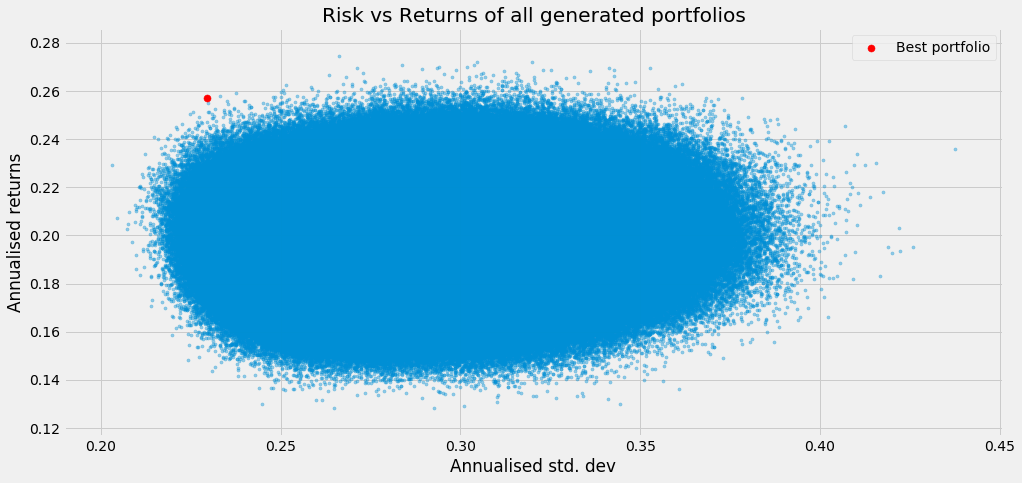

In [22]:
def show_efficient_frontier(x,y,best_pf_id):
    """
    x = Annual volatility (risk) of portfolios generated.
    y = Annual return of portfolios generated.
    """
    plt.figure(figsize=(15,7))
    plt.scatter(x,y,cmap= "RdYlGn", marker='o', s=10, alpha=0.4)
    plt.scatter(x[best_pf_id],y[best_pf_id],marker='o',
                color='r',s=50, label='Best portfolio')
    plt.title('Risk vs Returns of all generated portfolios')
    plt.xlabel('Annualised std. dev')
    plt.ylabel('Annualised returns')
    plt.legend()
    plt.show()

    return

# Visualize efficient frontier
show_efficient_frontier(std_dev, ret, best_pf_id)

## 6) Backtest portfolio performance on test set :-

In [21]:
# Testing best weights on test data
test_daily_returns = test_df.pct_change(1)
test_mean_returns = get_geometric_mean(test_daily_returns)
test_cov_matrix = test_daily_returns.cov()

test_pf_return, test_pf_std_dev = portfolio_yearly_performance(best_pf_weights,
                                                               test_mean_returns,
                                                               test_cov_matrix)

print("\nBest portfolio performance on test data:-")
print("Avg annualised return = {}%".format(round(100*test_pf_return, 4)))
print("Avg annualised std. dev = {}%".format(round(100*test_pf_std_dev, 4)))


Best portfolio performance on test data:-
Avg annualised return = 17.6899%
Avg annualised std. dev = 13.296%


### Conclusion :-  Best portfolio chosen from ~8 years of data (2007-2015) gave an annual return of 17.689% on an average for the next ~5 years (2015-2020)